In [1]:
#testing reaction network code
import jax
import jax.numpy as jnp
import numpy as np
import matplotlib.pyplot as plt
from diffrax import diffeqsolve, ODETerm, Tsit5, SaveAt, Kvaerno3, PIDController
import optax  
import pickle as pkl
#from reaction_nets import rxn_net
from functools import partial
import random
#from modified_reaction_nets import random_rxn_net
from reaction_nets_numpy import random_rxn_net
#from rxn_nets_old import rxn_net

In [2]:
n=3
m=n*(n-1)/2
n_second_order=1
n_inputs=1
test=True
all_features=jnp.linspace(-20, 20, 50)
A=np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]]) #adjacency matrix
second_order_edge_idxs=np.array([[0, 1]])
F_a_idxs=np.array([[1, 2]])
E=np.array([0, 0, 0])
B=-1*jnp.log(np.array([1, 1, 10, 0.05, 0.1, 4]))
F=np.array([0, 0, 0])
seed=0
solver='LSODA'
stepsize_controller=PIDController(
    rtol=1e-6,     
    atol=1e-9,   
    dtmin=1e-11,   
    dtmax=1e-1     
    )
dt=0.1
random_rxn_net_b=random_rxn_net(n, m, seed, n_second_order, n_inputs, test, A, second_order_edge_idxs, F_a_idxs)
initial_conditions = jnp.log(jnp.array([0.2, 0.5, 0.3]))
t_points = jnp.linspace(0.0, 10.0, 200)
initial_conditions = jnp.log(jnp.array([0.2, 0.5, 0.3]))

In [21]:
solns_new=[]
for F_a in all_features:
   sol_F_a=random_rxn_net_b.integrate(solver=solver, t_points=t_points, dt0=0.1, initial_conditions=initial_conditions, args=(E, B, F, F_a,)) 
   solns_new.append(sol_F_a.y.T[-1].copy())

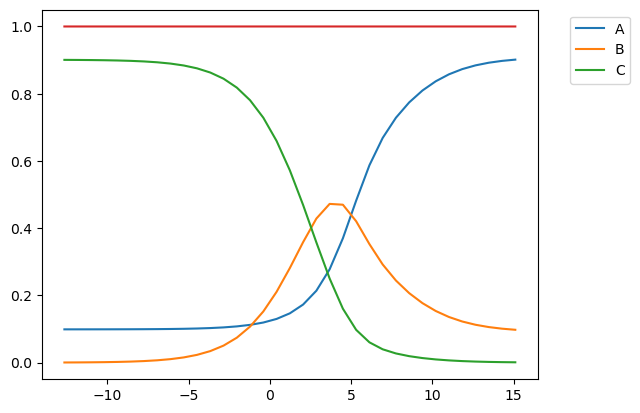

In [22]:
species_list = ['A', 'B', 'C']
i=0
for species, profile in zip(species_list, np.exp(np.array(solns_new)).T):
    plt.plot(all_features, profile, label=f'{species}')

plt.legend(bbox_to_anchor=[1.2, 1], loc='upper right')
plt.plot(all_features,  np.sum(np.exp(np.array(solns_new)), axis=1))

In [5]:
random_rxn_net_b.rxn_net_dynamics(1, initial_conditions, (E, B, F, 1,))

array([ 0.90000032, -2.17666115,  3.02776859])